In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
norm = 'minmax'
SAVE_NAME = norm + '_1e-3_filtered_log_4layers'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

## Random split valid

In [5]:
train_data = pd.read_csv('./csv/computed_minmaxnorm_2018_log.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_minmaxnorm,A_std_minmaxnorm,B_avg_minmaxnorm,B_std_minmaxnorm,C_avg_minmaxnorm,C_std_minmaxnorm,D_avg_minmaxnorm,D_std_minmaxnorm
Movie,,,,,,,,,,,,,,,,
tt0328810,4.308438,4.351987,15.820982,15.725770,0.336424,0.335943,9.025204,8.446634,0.304127,0.385545,0.836973,0.781866,0.424876,0.817968,0.941671,0.904347
tt10005184,4.852898,5.128792,13.870248,14.762869,0.099732,0.170803,8.552695,7.614880,0.443907,0.537414,0.771912,0.751751,0.099603,0.372418,0.818936,0.611160
tt10017502,3.464816,2.680851,14.985025,15.618921,0.268349,0.325218,8.206244,7.652673,0.087542,0.058829,0.809092,0.778524,0.331324,0.789032,0.728944,0.624481
tt10043732,3.729799,3.344649,15.602536,16.654683,0.315923,0.330436,8.339235,8.113956,0.155571,0.188605,0.829688,0.810918,0.396702,0.803111,0.763489,0.787081
tt10048096,3.349202,3.322474,16.273237,16.918459,0.296425,0.314294,8.349771,7.793370,0.057860,0.184269,0.852057,0.819167,0.369907,0.759558,0.766226,0.674076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,4.941889,4.402468,13.849033,14.518005,0.115961,0.170274,8.603843,8.232477,0.466754,0.395414,0.771204,0.744093,0.121906,0.370990,0.832222,0.828858
tt9879080,4.426478,3.947812,14.387161,14.694599,0.058649,0.080815,7.524463,7.256423,0.334431,0.306526,0.789152,0.749616,0.043146,0.129630,0.551850,0.484806
tt9891764,3.487894,2.994688,15.839656,16.387069,0.243142,0.287351,8.387383,7.987073,0.093466,0.120185,0.837596,0.802548,0.296684,0.686867,0.775996,0.742355


In [6]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt0328810,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
tt10005184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt10017502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
tt10043732,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt10048096,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tt9879080,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9891764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data = pd.read_csv('./csv/computed_minmaxnorm_2019_log.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_minmaxnorm,A_std_minmaxnorm,B_avg_minmaxnorm,B_std_minmaxnorm,C_avg_minmaxnorm,C_std_minmaxnorm,D_avg_minmaxnorm,D_std_minmaxnorm
Movie,,,,,,,,,,,,,,,,
47metersdown,3.549758,3.171456,16.295219,17.237230,0.245609,0.249743,8.251181,8.097400,0.156049,0.239449,0.525274,0.557236,0.451185,0.471811,0.588256,0.893642
adogsjourneymovie,3.544792,3.371073,14.804609,15.342963,0.335994,0.349169,8.078796,7.643166,0.152977,0.314242,0.319182,0.295138,0.717482,0.871405,0.490014,0.499590
aftermathmovie,3.574935,3.281359,13.511486,14.185602,0.204298,0.259951,8.074959,7.868407,0.171625,0.280628,0.140395,0.135001,0.329474,0.512840,0.487827,0.694989
aftermovie,4.065201,4.005587,15.561254,16.475720,0.212974,0.231655,8.064838,7.652976,0.474916,0.551984,0.423796,0.451871,0.355036,0.399117,0.482059,0.508100
alitamovie,3.577510,3.373904,14.744305,15.655279,0.267326,0.269637,7.953447,7.762304,0.173217,0.315303,0.310844,0.338351,0.515171,0.551766,0.418577,0.602944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,3.761437,3.967492,14.628833,15.682361,0.175808,0.220674,8.144664,8.082139,0.287000,0.537710,0.294879,0.342098,0.245535,0.354984,0.527552,0.880404
whatmenwant,3.468450,2.976872,16.813072,17.781275,0.241500,0.260970,8.700595,7.856420,0.105750,0.166542,0.596873,0.632513,0.439081,0.516934,0.844378,0.684590
wonderparkmovie,3.306243,2.579715,18.878079,19.907206,0.431886,0.331712,8.622293,7.921932,0.005405,0.017734,0.882381,0.926665,1.000000,0.801244,0.799754,0.741422


In [8]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_label = train_label.loc[train_data.index, :]
train_label.to_csv('./csv/train_label_2018_filtered.csv', index = 0)

In [10]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1320, 16) (97, 16)
(1320, 20) (97, 20)


In [11]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1056, 16) (264, 16)


In [12]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1056, 20) (264, 20)


In [13]:
train_x = train_data.iloc[:, 8:].to_numpy()
val_x = val_data.iloc[:, 8:].to_numpy()
test_x = test_data.iloc[:, 8:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1056, 8) (1056, 20)
(264, 8) (264, 20)
(97, 8) (97, 20)


# Model start

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (8, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
Total params: 12,148
Trainable params: 12,148
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1056 samples, validate on 264 samples
Epoch 1/100
1056/1056 [==============================] - 0s 295us/step - loss: 0.5669 - acc: 0.7492 - val_loss: 0.4276 - val_acc: 0.7680
Epoch 2/100
1056/1056 [==============================] - 0s 66us/step - loss: 0.3521 - acc: 0.8797 - val_loss: 0.3326 - val_acc: 0.8896
Epoch 3/100
1056/1056 [==============================] - 0s 86us/step - loss: 0.3217 - acc: 0.8909 - val_loss: 0.3248 - val_acc: 0.8896
Epoch 4/100
1056/1056 [==============================] - 0s 94us/step - loss: 0.3201 - acc: 0.8899 - val_loss: 0.3239 - val_acc: 0.8896
Epoch 5/100
1056/1056 [==============================] - 0s 99us/step - loss: 0.3198 - acc: 0.8909 - val_loss: 0.3251 - val_acc: 0.8896


In [17]:
# save model weights
model.save(WEIGHTS_SAVE)

In [18]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

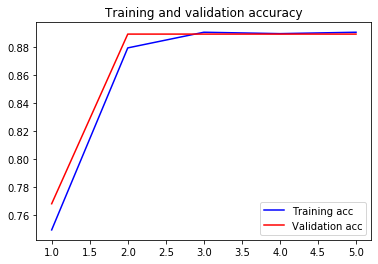

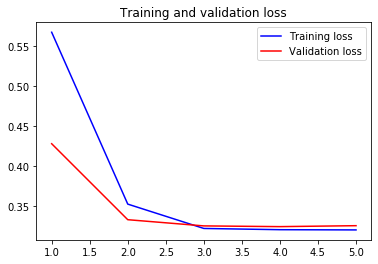

In [19]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [20]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 189us/step


In [21]:
pred.shape

(97, 20)

In [22]:
results = pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [23]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.189992,0.124159,0.103919,0.132842,0.190637,0.142627,0.088177,0.454173,0.105420,...,0.115345,0.121615,0.109149,0.101710,0.151175,0.097229,0.102935,0.163856,0.129968,0.100516
1,adogsjourneymovie,0.206413,0.140023,0.122814,0.157761,0.199938,0.162547,0.102074,0.460270,0.122703,...,0.129167,0.138281,0.126800,0.126536,0.165011,0.117476,0.125769,0.196576,0.151600,0.115477
2,aftermathmovie,0.245364,0.183746,0.156969,0.196964,0.242938,0.203368,0.145191,0.468388,0.166551,...,0.170956,0.179086,0.162910,0.162470,0.206913,0.155681,0.158407,0.227573,0.189785,0.156806
3,aftermovie,0.195162,0.152904,0.107118,0.151889,0.199616,0.163391,0.110281,0.460573,0.133137,...,0.130581,0.138981,0.116872,0.105354,0.159261,0.109064,0.107663,0.180783,0.134645,0.121917
4,alitamovie,0.226598,0.161324,0.139468,0.175389,0.225133,0.182536,0.123149,0.464013,0.144820,...,0.151316,0.158905,0.145467,0.141464,0.187534,0.135686,0.140710,0.207594,0.169396,0.135718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.200219,0.150808,0.110594,0.152586,0.203456,0.162785,0.111104,0.462342,0.129731,...,0.132548,0.139777,0.119089,0.110052,0.163032,0.109958,0.110131,0.181332,0.138289,0.123467
93,whatmenwant,0.183573,0.118394,0.100689,0.127415,0.189635,0.136365,0.083798,0.452411,0.099621,...,0.112548,0.116999,0.104292,0.097096,0.148237,0.093133,0.100070,0.157103,0.126622,0.094838
94,wonderparkmovie,0.145462,0.076913,0.069788,0.089917,0.155494,0.095700,0.049732,0.446096,0.061937,...,0.076700,0.076471,0.075375,0.068285,0.113720,0.061437,0.070853,0.123656,0.093142,0.061447
95,xmenmovies,0.202427,0.139024,0.115425,0.152644,0.202929,0.160609,0.101199,0.457366,0.123591,...,0.128448,0.134730,0.123278,0.116962,0.164180,0.112773,0.117102,0.185038,0.145226,0.114358


## Label top n dynamic

In [24]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,0.189992,0.124159,0.103919,0.132842,0.190637,0.142627,0.088177,0.454173,0.105420,0.107214,0.115345,0.121616,0.109149,0.101710,0.151175,0.097229,0.102935,0.163856,0.129968,0.100516
adogsjourneymovie,0.206413,0.140023,0.122814,0.157761,0.199938,0.162547,0.102074,0.460270,0.122703,0.126019,0.129167,0.138281,0.126800,0.126536,0.165011,0.117476,0.125769,0.196576,0.151600,0.115477
aftermathmovie,0.245364,0.183746,0.156969,0.196964,0.242938,0.203368,0.145191,0.468388,0.166551,0.167372,0.170956,0.179086,0.162910,0.162470,0.206913,0.155681,0.158407,0.227573,0.189785,0.156806
aftermovie,0.195162,0.152904,0.107118,0.151889,0.199616,0.163391,0.110281,0.460573,0.133137,0.125430,0.130581,0.138981,0.116872,0.105354,0.159261,0.109064,0.107663,0.180783,0.134645,0.121917
alitamovie,0.226598,0.161324,0.139468,0.175389,0.225133,0.182536,0.123149,0.464013,0.144820,0.145948,0.151316,0.158905,0.145467,0.141464,0.187534,0.135686,0.140710,0.207594,0.169396,0.135718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,0.200219,0.150808,0.110594,0.152586,0.203456,0.162785,0.111104,0.462342,0.129731,0.127353,0.132548,0.139777,0.119089,0.110052,0.163032,0.109959,0.110131,0.181332,0.138289,0.123467
whatmenwant,0.183573,0.118394,0.100689,0.127415,0.189635,0.136365,0.083798,0.452411,0.099621,0.102201,0.112548,0.116999,0.104292,0.097096,0.148237,0.093133,0.100070,0.157103,0.126622,0.094838
wonderparkmovie,0.145462,0.076913,0.069788,0.089917,0.155494,0.095700,0.049732,0.446096,0.061937,0.068808,0.076700,0.076471,0.075375,0.068285,0.113720,0.061437,0.070853,0.123656,0.093142,0.061447


In [26]:
labels = read_json('../genresDic.json')

In [27]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [28]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Action', 'Comedy'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.5 ['Drama', 'Action'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.0 ['Drama', 'Comedy', 'Action'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
apollo11movie.mp4 

In [29]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.000000,"[Horror, Mystery, Thriller]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [31]:
acc_df['acc'].mean()

0.4140893470790378